# Session 1: Why this Course? Why R?

## Course Objectives
- Learn fundamentals of R programming
- Apply R to real-world economic, finance, marketing, IT, and AI/ML problems
- Build workflow skills with R projects
- Gain practical experience with data analysis, modeling, and visualization

## Course Mechanics
- Labs, Assignments, Exams
- Getting Help
- LLM Use Policy
- Honor Code

## What is R? Why Use R?
- Open-source language for statistics and data analysis
- Rich ecosystem of packages (CRAN, Bioconductor)
- Strong visualization tools (ggplot2, lattice)
- Used widely in academia, finance, marketing, and data science
- Integrates well with reproducible research workflows

## Workflow in an R Project
1. Define the problem
2. Gather and clean data
3. Explore data visually
4. Build and validate models
5. Interpret results
6. Communicate findings

## Running Examples Overview
We will use a series of running examples from real-world problems:
1. Microeconomics: Estimating Demand Elasticity
2. Macroeconomics: Modelling GDP growth using ARIMA/S-ARIMA
3. Finance (derivatives): Pricing Options using Black-Scholes
4. Finance (insurance): Ruin-Theory Simulation
5. Digital Marketing: A/B Testing
6. IT: Code Quality Analysis
7. AI/ML: Image Classification using CNNs

In [3]:
# Required packages
# Only install packages once.
if (!requireNamespace("forecast", quietly = TRUE)) {
  install.packages("forecast", repos = "http://cran.us.r-project.org")
}
library(forecast)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



## Example 1: Microeconomics – Estimating Demand Elasticity

**Concept:** How sensitive is demand to price changes?

Elasticity formula:
$$E_d = \frac{\%\,\Delta Q}{\%\,\Delta P}$$

**Model:** Log-log regression

$$ \ln(Q) = \beta_0 + \beta_1 \ln(P) + \beta_2 \text{Advertising} + \varepsilon $$

In [1]:

# Example dataset
demand <- data.frame(
  Week = 1:4,
  Price = c(10, 11, 9, 10),
  Quantity = c(500, 460, 550, 490),
  Advertising = c(200, 200, 200, 250)
)

# Fit log-log regression
model <- lm(log(Quantity) ~ log(Price) + Advertising, data = demand)
summary(model)



Call:
lm(formula = log(Quantity) ~ log(Price) + Advertising, data = demand)

Residuals:
         1          2          3          4 
-9.922e-04  5.209e-04  4.712e-04  5.421e-19 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  8.351e+00  2.047e-02   407.9  0.00156 **
log(Price)  -8.907e-01  8.564e-03  -104.0  0.00612 **
Advertising -4.239e-04  2.808e-05   -15.1  0.04211 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001216 on 1 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9997 
F-statistic:  5557 on 2 and 1 DF,  p-value: 0.009485


## Example 2: Macroeconomics – GDP Growth using ARIMA/S-ARIMA

**Concept:** Forecast GDP growth using time series models.

We use ARIMA (AutoRegressive Integrated Moving Average).

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       445.6349 430.8903 460.3795 423.0851 468.1847
Feb 1961       420.3950 403.0907 437.6993 393.9304 446.8596
Mar 1961       449.1983 429.7726 468.6241 419.4892 478.9074
Apr 1961       491.8399 471.0270 512.6529 460.0092 523.6707
May 1961       503.3945 481.5559 525.2330 469.9953 536.7937
Jun 1961       566.8625 544.2637 589.4612 532.3007 601.4242
Jul 1961       654.2602 631.0820 677.4384 618.8122 689.7081
Aug 1961       638.5975 614.9704 662.2246 602.4630 674.7320
Sep 1961       540.8837 516.9028 564.8647 504.2081 577.5594
Oct 1961       494.1266 469.8624 518.3909 457.0177 531.2356
Nov 1961       423.3327 398.8381 447.8273 385.8715 460.7940
Dec 1961       465.5076 440.8229 490.1923 427.7556 503.2596

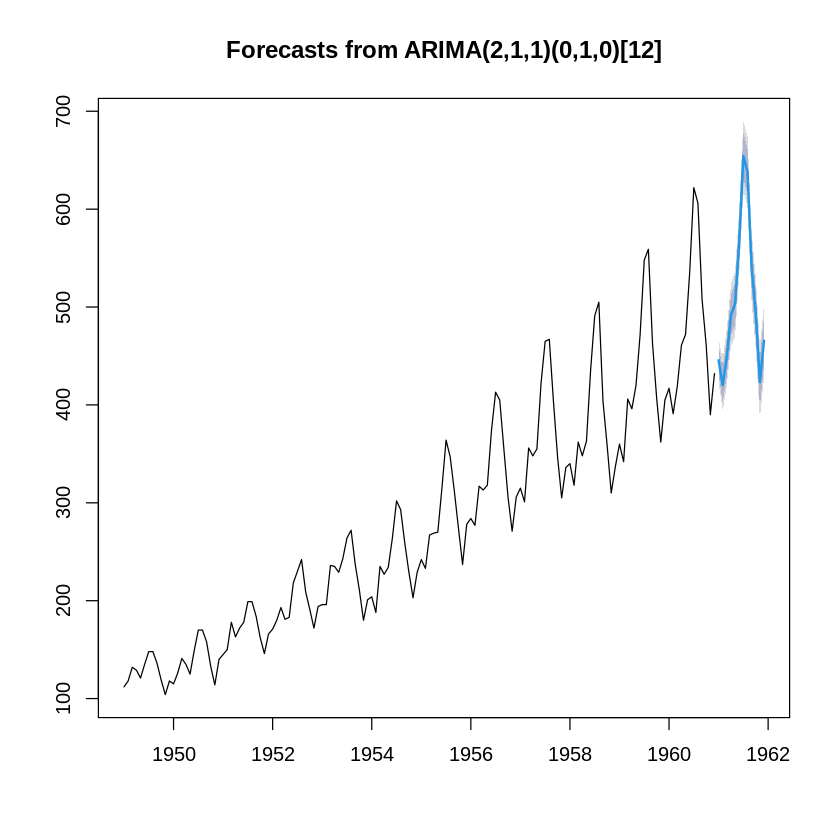

In [4]:

# Example with AirPassengers as placeholder for GDP series
library(forecast)
data <- AirPassengers
fit <- auto.arima(data)
forecast(fit, h=12)
plot(forecast(fit, h=12))


## Example 3: Finance – Pricing Options with Black-Scholes

**Formula (Call Option):**

$$ C = S_0 N(d_1) - K e^{-rT} N(d_2) $$

In [5]:

# Black-Scholes formula for a European call option
black_scholes_call <- function(S, K, r, T, sigma) {
  d1 <- (log(S/K) + (r + sigma^2/2)*T) / (sigma*sqrt(T))
  d2 <- d1 - sigma*sqrt(T)
  C <- S*pnorm(d1) - K*exp(-r*T)*pnorm(d2)
  return(C)
}

black_scholes_call(S=100, K=100, r=0.05, T=1, sigma=0.2)


[1] 10.45058

## Example 4: Finance (Insurance) – Ruin-Theory Simulation

**Concept:** Probability an insurer's reserve goes below zero.

In [6]:

set.seed(123)
simulate_ruin <- function(initial_capital=100, premium=10, claims=rgamma(100, 2, 0.1)) {
  capital <- initial_capital
  ruin <- FALSE
  for (i in seq_along(claims)) {
    capital <- capital + premium - claims[i]
    if (capital <= 0) {
      ruin <- TRUE
      break
    }
  }
  return(ruin)
}

simulate_ruin()


[1] TRUE

## Example 5: Digital Marketing – A/B Testing

**Concept:** Compare conversion rates between two groups (A vs. B).

In [7]:

# Example: conversion rates
A <- c(1,0,1,0,1,0,1,0,0,1)  # 1 = converted
B <- c(0,1,0,0,1,1,0,0,1,1)

prop.test(x = c(sum(A), sum(B)), n = c(length(A), length(B)))



	2-sample test for equality of proportions without continuity correction

data:  c(sum(A), sum(B)) out of c(length(A), length(B))
X-squared = 0, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.4382613  0.4382613
sample estimates:
prop 1 prop 2 
   0.5    0.5 


## Example 6: IT – Code Quality Analysis

**Concept:** Analyze code complexity and errors (placeholder with text analysis).

In [8]:

library(stringr)
code_samples <- c("for(i in 1:10){print(i)}", "while(TRUE){ }")
str_count(code_samples, "for")
str_count(code_samples, "while")


[1] 1 0

[1] 0 1

## Example 7: AI/ML – Image Classification with CNNs

**Concept:** Classify images using Convolutional Neural Networks.

In R, we can use the `keras` package.

In [6]:

# Placeholder code - requires keras/tensorflow setup
# library(keras)
# model <- keras_model_sequential() %>%
#   layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu', input_shape = c(28,28,1)) %>%
#   layer_max_pooling_2d(pool_size = c(2,2)) %>%
#   layer_flatten() %>%
#   layer_dense(units = 128, activation = 'relu') %>%
#   layer_dense(units = 10, activation = 'softmax')
